### Тема “Обучение без учителя”

***

#### Задание 1
- Импортируйте библиотеки pandas, numpy и matplotlib.

- Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

- Создайте датафреймы X и y из этих данных.

- Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

- Масштабируйте данные с помощью StandardScaler.

- Постройте модель TSNE на тренировочный данных с параметрами:n_components=2, learning_rate=250, random_state=42.

- Постройте диаграмму рассеяния на этих данных.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [32]:
feature_names = boston.feature_names.tolist()

In [33]:
X = pd.DataFrame(boston.data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [39]:
y = pd.DataFrame(boston.target, columns=['target'])
y.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size = 0.2, random_state = 42) 

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

# почему разные методы используются? сделано как в уроке.
# fit_transform(X[, y]) Fit to data, then transform it.
# transform(X[, copy]) Perform standardization by centering and scaling.
# в чем разница.

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,6.377707,-0.562998,1.317014,-0.307979,1.410237,-1.097251,0.722744,-1.178129,2.649297,2.382878,0.980293,-1.248227,2.351459
1,10.626731,-0.562998,1.317014,-0.307979,1.410237,-0.889321,1.225881,-1.261664,2.649297,2.382878,0.980293,0.123515,1.705818
2,3.026832,-0.562998,1.317014,-0.307979,1.112918,-3.002815,1.225881,-1.375171,2.649297,2.382878,0.980293,-0.240982,1.758644
3,1.615658,-0.562998,1.317014,-0.307979,1.112918,-0.991918,1.225881,-1.326014,2.649297,2.382878,0.980293,-1.183235,0.113728
4,0.883562,-0.562998,1.317014,-0.307979,0.570748,-0.979606,1.153512,-1.248216,2.649297,2.382878,0.980293,-1.614453,2.207657


In [44]:
from sklearn.manifold import TSNE

In [45]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


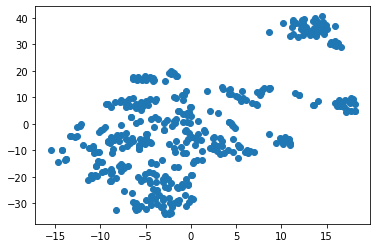

In [46]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

In [27]:
# ?StandardScaler

#### Задание 2

- С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма  X_train.

- Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

- Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [47]:
from sklearn.cluster import KMeans

In [50]:
# ?KMeans

In [78]:
nclst = 3

In [79]:
kmeans = KMeans(n_clusters = nclst, max_iter=100, random_state=42)

In [80]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [81]:
labels_train

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

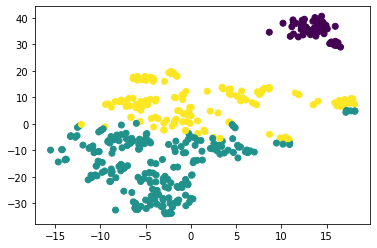

In [82]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [86]:
for i in range(nclst):
    print(f'label = {i}:')
    print(f'\t <CRIM> = { X_train_scaled.CRIM[labels_train==i].mean() }')
    print(f'\t <price> = { y_train[labels_train==i].mean() }')
    



label = 0:
	 <CRIM> = 1.8137866410545807
	 <price> = target    17.883333
dtype: float64
label = 1:
	 <CRIM> = -0.2888744367798734
	 <price> = target    27.63381
dtype: float64
label = 2:
	 <CRIM> = -0.18080908936196183
	 <price> = target    21.270548
dtype: float64


In [59]:
y_train.mean()


target    24.175743
dtype: float64

In [74]:
y_train[labels_train == 0].mean()

target    17.883333
dtype: float64

#### *Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.